In [74]:
from gensim.models import Word2Vec
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

### Loading the Word2Vec model

In [75]:
model = Word2Vec.load('../Data/Word2Vec/tweets_presidential_elections_300_min1_cont2_cbow')

### Informations about model

In [76]:
len(model.wv.vocab)

141097

### Tests with model

#### Adjectives similarities

In [77]:
model.most_similar('corrupto')

C:\Users\raula\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('ladrão', 0.8406648635864258),
 ('bandido', 0.8354353904724121),
 ('criminoso', 0.7990443706512451),
 ('ladrao', 0.7533546686172485),
 ('tucano', 0.7211666703224182),
 ('politico', 0.7174848318099976),
 ('condenado', 0.7118803262710571),
 ('vagabundo', 0.708651602268219),
 ('safado', 0.6905996799468994),
 ('canalha', 0.6895062923431396)]

In [78]:
model.most_similar('bom')

C:\Users\raula\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('ótimo', 0.736582338809967),
 ('perfeito', 0.6746100783348083),
 ('péssimo', 0.6623778343200684),
 ('melhor', 0.6299581527709961),
 ('legal', 0.6268087029457092),
 ('ruim', 0.6168817281723022),
 ('lindo', 0.6121782064437866),
 ('maravilhoso', 0.6011318564414978),
 ('certo', 0.5958089828491211),
 ('errado', 0.5855730772018433)]

In [79]:
model.most_similar('esquerda')

C:\Users\raula\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('direita', 0.8797248601913452),
 ('população', 0.7382278442382812),
 ('elite', 0.7286158800125122),
 ('oposição', 0.7231075763702393),
 ('imprensa', 0.7006427049636841),
 ('sociedade', 0.69990473985672),
 ('mídia', 0.6905674338340759),
 ('direitasóacho', 0.669465184211731),
 ('ditadura', 0.6637107133865356),
 ('violência', 0.6544392704963684)]

In [80]:
model.most_similar('réu')

C:\Users\raula\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('julgado', 0.7638018131256104),
 ('tucano', 0.7587553262710571),
 ('condenado', 0.7346660494804382),
 ('criminoso', 0.7097383737564087),
 ('investigado', 0.6928986310958862),
 ('expresidente', 0.6807794570922852),
 ('corrupto', 0.6659649610519409),
 ('considerado', 0.6621046662330627),
 ('culpado', 0.661752462387085),
 ('negado', 0.6599233746528625)]

#### Similarities between candidate names

Os exemplos abaixo fazem uma verificação com relação à similaridade entre palavras. 
Alguns aspectos interessantes podem ser notados em alguns testes:
- Pronomes foram associados a nomes;
- Adjetivos normalmente atribuídos a um candidato aparecem com alta similaridade quando o nome do candidato é dado como entrada;
- Nomes de outros candidatos normalmente aparecem quando o nome de um candidato é dado como entrada;
- Nomes de partidos aparecem quando um nome de candidato é dado como entrada.

In [81]:
model.most_similar('lula')

C:\Users\raula\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('ele', 0.6658040285110474),
 ('petista', 0.6585592031478882),
 ('expresidente', 0.6573039293289185),
 ('bandido', 0.6341908574104309),
 ('molusco', 0.609594464302063),
 ('condenado', 0.6085819005966187),
 ('criminoso', 0.6076935529708862),
 ('corrupto', 0.6038070917129517),
 ('luladrão', 0.602912425994873),
 ('bolsonaro', 0.5850706100463867)]

In [82]:
model.most_similar('bolsonaro')

C:\Users\raula\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('ciro', 0.6129334568977356),
 ('bolsolixo', 0.6054478883743286),
 ('bolso', 0.5919108390808105),
 ('mito', 0.5851829051971436),
 ('lula', 0.5850706100463867),
 ('trump', 0.5794508457183838),
 ('gomes', 0.5755366086959839),
 ('nordeste', 0.5740717649459839),
 ('petista', 0.5675337314605713),
 ('fascismo', 0.5580141544342041)]

In [83]:
model.most_similar('marina')

C:\Users\raula\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('manu', 0.6242735385894775),
 ('manuela', 0.6208099126815796),
 ('boulos', 0.5899618864059448),
 ('submarina', 0.5810409784317017),
 ('bolsonaromarina', 0.5647255182266235),
 ('haddad', 0.5642256736755371),
 ('silva', 0.5468045473098755),
 ('murina', 0.5387901663780212),
 ('geraldo', 0.5384024381637573),
 ('margie', 0.5311382412910461)]

In [84]:
model.most_similar('manuela')

C:\Users\raula\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('manu', 0.8673732876777649),
 ('manoela', 0.8245112895965576),
 ('manuella', 0.7623773813247681),
 ('boulos', 0.7289538383483887),
 ('dávila', 0.713313102722168),
 ('haddad', 0.6591469049453735),
 ('davila', 0.6366347074508667),
 ('amoedo', 0.633353590965271),
 ('doria', 0.6229133605957031),
 ('marina', 0.6208099126815796)]

In [85]:
model.most_similar('temer')

C:\Users\raula\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('psdb', 0.5686669945716858),
 ('senado', 0.5534663200378418),
 ('fhc', 0.552035927772522),
 ('pt', 0.5514092445373535),
 ('lula', 0.5505332946777344),
 ('alckmin', 0.548015296459198),
 ('trump', 0.5426720380783081),
 ('serra', 0.5397273302078247),
 ('geraldo', 0.5376938581466675),
 ('neves', 0.5183644890785217)]

In [86]:
model.most_similar('ciro')

C:\Users\raula\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('arthur', 0.6565069556236267),
 ('bolsonaro', 0.6129334568977356),
 ('rapaz', 0.5918129086494446),
 ('trump', 0.5887680053710938),
 ('senhor', 0.5734490156173706),
 ('coroné', 0.5734205842018127),
 ('cara', 0.5671334862709045),
 ('lula', 0.5579526424407959),
 ('youtuber', 0.5546096563339233),
 ('sujeito', 0.5466962456703186)]

#### Semantics regulaties

In [87]:
# Esquerda está para Lula assim como direita está para...
model.most_similar(positive=['lula', 'direita'], negative=['esquerda'])

C:\Users\raula\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('petista', 0.5897294282913208),
 ('bolsonaro', 0.5586472153663635),
 ('molusco', 0.5556932687759399),
 ('ele', 0.5486916899681091),
 ('trump', 0.5433017015457153),
 ('bandido', 0.5372085571289062),
 ('corrupto', 0.536354124546051),
 ('outro', 0.5241113901138306),
 ('alckmin', 0.5196800231933594),
 ('luladrão', 0.5195620059967041)]

In [88]:
# Lula está para PT assim como Alckmin está para...
model.most_similar(positive=['pt', 'alckmin'], negative=['lula'])

C:\Users\raula\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('psdb', 0.5631870627403259),
 ('pmdb', 0.545505166053772),
 ('psol', 0.5343799591064453),
 ('amoedo', 0.5104071497917175),
 ('mdb', 0.5019980669021606),
 ('boulos', 0.486980140209198),
 ('pdt', 0.4843161106109619),
 ('dória', 0.47846806049346924),
 ('governo', 0.47634315490722656),
 ('partido', 0.46930065751075745)]

In [89]:
#Lula está para 'ele' assim como Marina está para...
model.most_similar(positive=['ele', 'marina'], negative=['lula'])

C:\Users\raula\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('ela', 0.595608115196228),
 ('tu', 0.5274435877799988),
 ('pessoa', 0.5209347009658813),
 ('vc', 0.5169470310211182),
 ('você', 0.5042309761047363),
 ('manuela', 0.49963468313217163),
 ('voce', 0.4887855350971222),
 ('manu', 0.48255905508995056),
 ('senhora', 0.4718356430530548),
 ('alguém', 0.4707336723804474)]

In [95]:
model.most_similar(positive=['bolsonaro', 'esquerda'], negative=['direita'])

C:\Users\raula\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('lula', 0.5904990434646606),
 ('pt', 0.574676513671875),
 ('ciro', 0.5745781660079956),
 ('petista', 0.546591579914093),
 ('psdb', 0.5373578071594238),
 ('bolsolixo', 0.5339213013648987),
 ('gomes', 0.5172179937362671),
 ('ele', 0.5156170129776001),
 ('bolso', 0.5122733116149902),
 ('expresidente', 0.5089086294174194)]

In [90]:
def  plot_word_with_similars(model, word):
    '''
    Dados um modelo Word2Vec e uma palavras,
    plota os vetores das palavras mais similares
    à palavra dada como entrada.
    '''
    arr = np.empty((0,300), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.similar_by_word(word)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

In [91]:
def plot_vord_vectors(model, words):
    '''
    Dado um modelo Word2Vec e uma lista de palavras,
    plota os vetores das palavras dadas como entrada.
    '''
    arr = np.empty((0, 300), dtype='f')
    for name in words:
        arr = np.append(arr, np.array([model[name]]), axis=0)
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(words, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

C:\Users\raula\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


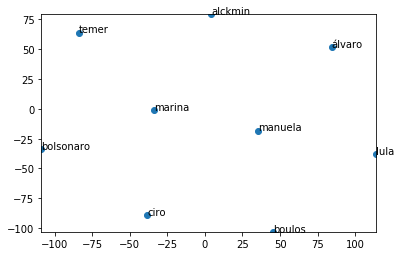

In [92]:
plot_candidate_names_vectors(model)

C:\Users\raula\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  
C:\Users\raula\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':
C:\Users\raula\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


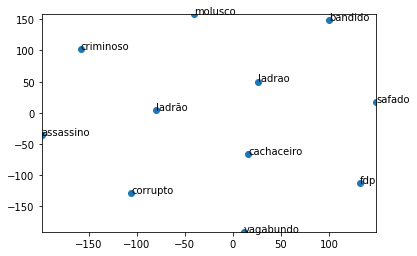

In [93]:
plot_with_similars(model, 'ladrão')

C:\Users\raula\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


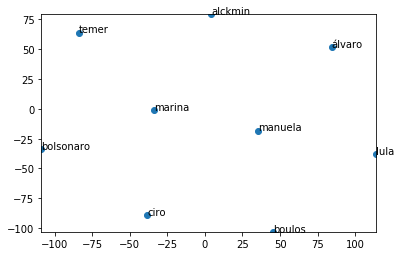

In [94]:
candidate_names = ['lula', 'temer', 'bolsonaro', 'alckmin', 'marina', 'manuela', 'boulos', 'ciro', 'álvaro']
plot_vord_vectors(model, candidate_names)